In [17]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("EBITDA_new.csv")
df

,ticker,fiscalQuarter,commonSharesOutstanding_,commonSharesTraded_,capitalExpenditure_,netIncome_,operatingIncome_,shareholdersEquity_,totalAssets_,EPS_,...,salePrice,realGDPSA,m2SA,m2m1GrowthGap,m2Velocity,primeRate,revenue_,EBITDA_lag1,year,quarter
0,0,2013Q1,-0.000933,12.247579,0.000000,-0.073272,-0.095742,-0.003005,0.00000,0.00,...,13.564960,-0.867729,9.261987,0.172473,1.581,3.250000,-0.00300,NaN,2013,1
1,0,2013Q2,-0.000933,12.247579,0.000000,-0.073210,-0.095754,-0.003005,0.00000,0.00,...,13.651304,-0.849252,9.272702,-0.640550,1.572,3.250000,-0.00300,50.369,2013,2
2,0,2013Q3,-0.000933,12.247579,0.000000,-0.073519,-0.095692,-0.003005,0.00000,0.00,...,13.650265,-0.790315,9.286502,-0.328302,1.571,3.250000,-0.00300,42.617,2013,3
3,0,2013Q4,-0.000933,12.247579,0.000000,-0.072407,-0.095729,0.000000,0.00000,0.00,...,13.978878,-0.729457,9.305890,-1.494308,1.563,3.250000,0.00000,46.147,2013,4
4,0,2014Q1,-0.000933,12.247579,0.000000,-0.073519,-0.095692,-0.006018,0.00000,0.00,...,13.796973,-0.753759,9.321372,-1.579023,1.539,3.250000,-0.00600,67.587,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,11,2022Q4,1.116244,14.488942,3.970292,2.422222,2.417428,NaN,4848.35925,1.12,...,14.303885,0.925248,9.968103,1.365277,1.253,6.819672,-904.00000,137.428,2022,4
535,11,2023Q1,1.077239,14.488942,2.564949,2.422222,2.417428,NaN,4848.35925,0.81,...,14.193683,0.985434,9.956538,1.945551,1.288,7.693548,-943.29475,177.311,2023,1
536,11,2023Q2,1.037409,14.488942,3.367296,2.422222,2.417428,NaN,4848.35925,1.25,...,14.029054,1.038587,9.941376,2.367239,1.322,8.158730,-943.29475,95.775,2023,2
537,11,2023Q3,1.009074,14.488942,3.761200,2.422222,2.417428,NaN,4848.35925,1.49,...,14.013110,1.132989,9.940176,1.509829,1.348,8.432540,-943.29475,149.372,2023,3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ticker                    539 non-null    int64  
 1   fiscalQuarter             539 non-null    object 
 2   commonSharesOutstanding_  539 non-null    float64
 3   commonSharesTraded_       539 non-null    float64
 4   capitalExpenditure_       539 non-null    float64
 5   netIncome_                539 non-null    float64
 6   operatingIncome_          539 non-null    float64
 7   shareholdersEquity_       460 non-null    float64
 8   totalAssets_              539 non-null    float64
 9   EPS_                      539 non-null    float64
 10  costOfGoodsSold_          539 non-null    float64
 11  debtToTotalAssets         539 non-null    float64
 12  niToAsset                 539 non-null    float64
 13  ROA                       539 non-null    float64
 14  revenueGro

In [20]:
# calculate revenue_lag1
df['revenue_lag1'] = df.groupby('ticker')['revenue_'].shift(1)
df.head()

,ticker,fiscalQuarter,commonSharesOutstanding_,commonSharesTraded_,capitalExpenditure_,netIncome_,operatingIncome_,shareholdersEquity_,totalAssets_,EPS_,...,realGDPSA,m2SA,m2m1GrowthGap,m2Velocity,primeRate,revenue_,EBITDA_lag1,year,quarter,revenue_lag1
0,0,2013Q1,-0.000933,12.247579,0.0,-0.073272,-0.095742,-0.003005,0.0,0.0,...,-0.867729,9.261987,0.172473,1.581,3.25,-0.003,NaN,2013,1,NaN
1,0,2013Q2,-0.000933,12.247579,0.0,-0.073210,-0.095754,-0.003005,0.0,0.0,...,-0.849252,9.272702,-0.640550,1.572,3.25,-0.003,50.369,2013,2,-0.003
2,0,2013Q3,-0.000933,12.247579,0.0,-0.073519,-0.095692,-0.003005,0.0,0.0,...,-0.790315,9.286502,-0.328302,1.571,3.25,-0.003,42.617,2013,3,-0.003
3,0,2013Q4,-0.000933,12.247579,0.0,-0.072407,-0.095729,0.000000,0.0,0.0,...,-0.729457,9.305890,-1.494308,1.563,3.25,0.000,46.147,2013,4,-0.003
4,0,2014Q1,-0.000933,12.247579,0.0,-0.073519,-0.095692,-0.006018,0.0,0.0,...,-0.753759,9.321372,-1.579023,1.539,3.25,-0.006,67.587,2014,1,0.000


In [21]:
# drop missing value
df.dropna(inplace=True)

In [22]:
# train-test-split
train = df[df['year'] < 2021]
test = df[df['year'] >= 2021]

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# use lag1 as predicted value
y_true_train = train["revenue_"]
y_pred_train = train["revenue_lag1"]

y_true_test = test["revenue_"]
y_pred_test = test["revenue_lag1"]

def calculatePerformance(y_true, y_pred):
    # Compute RMSE, R-Squared, and MPAE for each target column
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    r_squared = r2_score(y_true, y_pred)
    mpae = mean_absolute_percentage_error(y_true, y_pred)

    performance_metrics = {'MSE': mse, 'RMSE': rmse, 'R-Squared': r_squared, 'MPAE': mpae}
    # Convert results to DataFrame for better visualization
    performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
    return performance_df

performan_train = calculatePerformance(y_true_train, y_pred_train)
performan_test = calculatePerformance(y_true_test, y_pred_test)

print("performance on training set\n", performan_train)
print("\n")
print("performance on testing set\n", performan_test)

performance on training set
                       0
MSE        3.368981e+03
RMSE       5.804292e+01
R-Squared  9.899380e-01
MPAE       4.057297e+10


performance on testing set
                      0
MSE        1594.712017
RMSE         39.933846
R-Squared     0.994145
MPAE          0.051507


##### OLS

In [ ]:
# drop non-numerical columns
train = train.drop(columns=['fiscalQuarter'])
test = test.drop(columns=['fiscalQuarter'])

# split X and y
X_train = train.drop(columns=['revenue_']) 
y_train = train['revenue_'] 

X_test = test.drop(columns=['revenue_'])  
y_test = test['revenue_']

if train directedly without any processing

In [25]:
import statsmodels.api as sm

# add bias
X_train = sm.add_constant(X_train)  
X_test = sm.add_constant(X_test)  

# build OLS
ols_model = sm.OLS(y_train, X_train).fit() 

# predtction
y_pred_train_ols = ols_model.predict(X_train) 
y_pred_test_ols = ols_model.predict(X_test) 

# caluculate performance matrix
performan_train_ols = calculatePerformance(y_true_train, y_pred_train_ols)
performan_test_ols = calculatePerformance(y_true_test, y_pred_test_ols)

print("OLS performance on training set\n", performan_train_ols)
print("\n")
print("OLS performance on testing set\n", performan_test_ols)

OLS performance on training set
                       0
MSE        2.441893e+03
RMSE       4.941551e+01
R-Squared  9.927069e-01
MPAE       2.948651e+13


OLS performance on testing set
                      0
MSE        5311.661810
RMSE         72.881149
R-Squared     0.980499
MPAE          2.416524


In [26]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenue_   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1422.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          3.41e-305
Time:                        22:46:20   Log-Likelihood:                -1771.3
No. Observations:                 333   AIC:                             3603.
Df Residuals:                     303   BIC:                             3717.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -6.976e+04   5.51e+04     -1.267      0.206   -1.78e+05    3.86e+04
ticker                     -32.2662     11.091     -2.909      0.004     -54.091     -10.441
commonSharesOutstanding_    -4.0470      8.359     -0.484      0.629     -20.496      12.402
commonSharesTraded_         -0.1390      2.572     -0.054      0.957      -5.199       4.921
capitalExpenditure_          1.5848      4.526      0.350      0.726      -7.322      10.492
netIncome_                  17.3002      5.709      3.030      0.003       6.065      28.535
operatingIncome_             8.2076     11.338      0.724      0.470     -14.104      30.519
shareholdersEquity_         14.0514      3.981      3.530      0.000       6.217      21.885
totalAssets_                 0.0141      0.009      1.586      0.114      -0.003       0.032
EPS_                         0.4451      1.426      0.312      0.755      -2.360       3.250
costOfGoodsSold_           -17.6763     14.874     -1.188      0.236     -46.946      11.593
debtToTotalAssets            0.1022      0.173      0.590      0.555      -0.238       0.443
niToAsset                   -5.5492     47.943     -0.116      0.908     -99.893      88.795
ROA                         -4.6075     45.321     -0.102      0.919     -93.791      84.576
revenueGrowth               -3.0308      6.297     -0.481      0.631     -15.423       9.361
netIncomeGrowth              0.0637      0.242      0.263      0.793      -0.413       0.541
mva                         -0.0355      0.007     -5.069      0.000      -0.049      -0.022
ebitdaGrowth                -0.1822      1.340     -0.136      0.892      -2.819       2.455
companyName                 34.2985     11.611      2.954      0.003      11.450      57.147
EBITDA                       0.3939      0.151      2.615      0.009       0.098       0.690
salePrice                  -52.6616     23.714     -2.221      0.027     -99.326      -5.997
realGDPSA                 -369.7096    154.971     -2.386      0.018    -674.665     -64.754
m2SA                      1432.2492    583.037      2.457      0.015     284.936    2579.563
m2m1GrowthGap                0.4774      0.348      1.373      0.171      -0.207       1.161
m2Velocity                1420.0514    525.661      2.701      0.007     385.644    2454.459
primeRate                  -18.8698     14.090     -1.339      0.182     -46.597       8.857
EBITDA_lag1                 -0.3130      0.150     -2.081      0.038      -0.609      -0.017
year                        27.1544     27.251      0.996      0.320     -26.471      80.780
quarter                      7.0284      8.142      0.863      0.389      -8.993      23.050
revenue_lag1                 0.8718      0.023     37.567      0.000       0.826       0.918
==============

if scale the dataset and use PCA to reduce correlation

In [27]:
# process the input features

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scale X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)       

# use PCA to reduce correlation
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)  
X_test_pca = pca.transform(X_test_scaled)   

# check component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of each principal component:\n", explained_variance)

# keep main component(accumulated variance > 90%)
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.90) + 1 
print(f"Number of principal components chosen: {n_components}")

X_train_pca = X_train_pca[:, :n_components]
X_test_pca = X_test_pca[:, :n_components]

Explained Variance Ratio of each principal component:
 [2.46397857e-01 1.58555251e-01 1.06580488e-01 7.82220153e-02
 6.24376636e-02 5.35168941e-02 4.92292198e-02 4.09181367e-02
 3.90565307e-02 3.16182665e-02 2.57232365e-02 2.10726323e-02
 1.81670777e-02 1.48074750e-02 1.32043033e-02 1.15562207e-02
 8.74141152e-03 4.60948865e-03 4.40895437e-03 3.28110353e-03
 3.08705907e-03 1.20940116e-03 1.13455583e-03 1.03291121e-03
 7.53061011e-04 5.46734420e-04 8.28569245e-05 3.42048926e-05
 1.49898900e-05 0.00000000e+00]
Number of principal components chosen: 12


In [28]:
# add bias
X_train_pca_with_const = sm.add_constant(X_train_pca)  
X_test_pca_with_const = sm.add_constant(X_test_pca)  

# build OLS
ols_model = sm.OLS(y_train, X_train_pca_with_const).fit() 

# predtction
y_pred_train_ols = ols_model.predict(X_train_pca_with_const)  
y_pred_test_ols = ols_model.predict(X_test_pca_with_const)  

# caluculate performance matrix
performan_train_ols = calculatePerformance(y_true_train, y_pred_train_ols)
performan_test_ols = calculatePerformance(y_true_test, y_pred_test_ols)

print("OLS performance on training set\n", performan_train_ols)
print("\n")
print("OLS performance on testing set\n", performan_test_ols)

OLS performance on training set
                       0
MSE        2.240322e+04
RMSE       1.496771e+02
R-Squared  9.330890e-01
MPAE       2.377026e+15


OLS performance on testing set
                       0
MSE        25160.153864
RMSE         158.619525
R-Squared      0.907629
MPAE           2.714992


In [29]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenue_   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     371.9
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          8.16e-180
Time:                        22:46:20   Log-Likelihood:                -2140.3
No. Observations:                 333   AIC:                             4307.
Df Residuals:                     320   BIC:                             4356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        474.9522      8.367     56.764      0.000     458.491     491.414
x1           193.2843      3.130     61.750      0.000     187.126     199.443
x2            50.3236      3.902     12.897      0.000      42.647      58.000
x3           -59.9482      4.759    -12.596      0.000     -69.312     -50.585
x4            50.4843      5.555      9.087      0.000      39.555      61.414
x5            32.1880      6.218      5.177      0.000      19.954      44.422
x6           -85.3623      6.716    -12.710      0.000     -98.576     -72.148
x7           -24.2580      7.003     -3.464      0.001     -38.035     -10.481
x8           -24.6334      7.681     -3.207      0.001     -39.745      -9.522
x9           -42.2254      7.862     -5.371      0.000     -57.693     -26.758
x10           -9.2361      8.738     -1.057      0.291     -26.427       7.955
x11          -11.1441      9.688     -1.150      0.251     -30.204       7.915
x12            0.4118     10.703      0.038      0.969     -20.646      21.470
==============================================================================
Omnibus:                       38.621   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.130
Skew:                          -0.803   Prob(JB):                     4.79e-12
Kurtosis:                       4.085   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

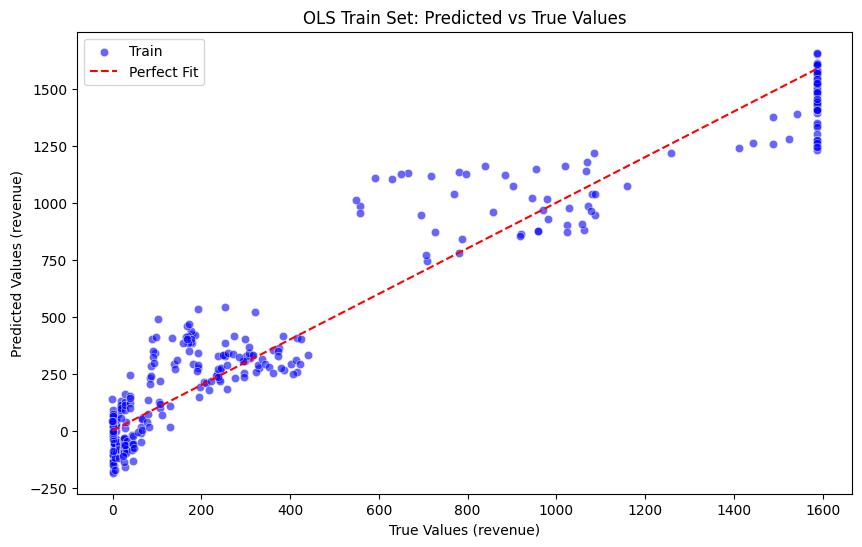

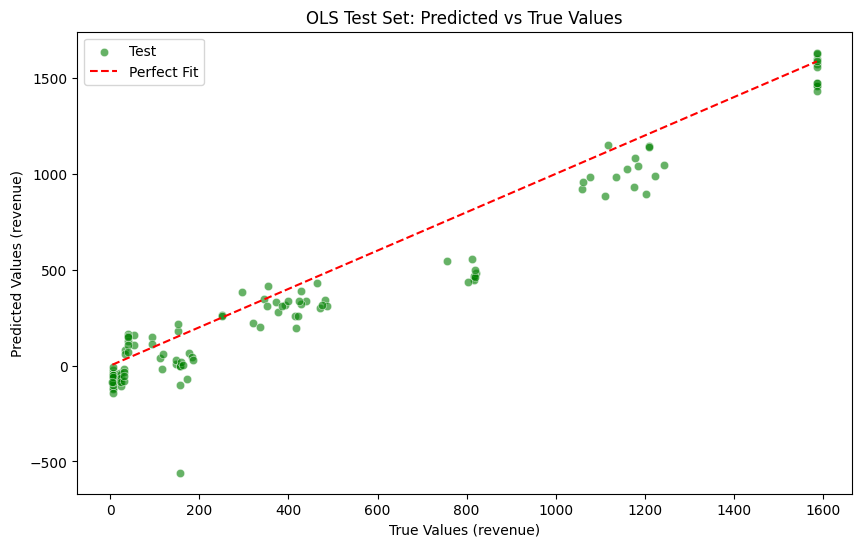

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot result of training set
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_train, y=y_pred_train_ols, color='blue', label='Train', alpha=0.6)

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label="Perfect Fit")

plt.title('OLS Train Set: Predicted vs True Values')
plt.xlabel('True Values (revenue)')
plt.ylabel('Predicted Values (revenue)')
plt.legend()
plt.show()

# plot result of testing set
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred_test_ols, color='green', label='Test', alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")

plt.title('OLS Test Set: Predicted vs True Values')
plt.xlabel('True Values (revenue)')
plt.ylabel('Predicted Values (revenue)')
plt.legend()
plt.show()